In [145]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
# Imports
from backtest_utils import TradingSimulator
import pickle

In [147]:
strategy_name = 'dumb_strategy'
TS = TradingSimulator(strategy_name)

NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


In [148]:
# Dump New symbols into the stock_symbols.pkl
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
symbols = []  # Example list of stock symbols
if len(symbols) > 0:
    TS.SAU.add_stock_symbols_to_pickle(symbols, stock_symbols_pickle)

In [149]:
# Load the data from 'stock_symbols.pkl' into a variable called 'symbols'
with open(stock_symbols_pickle, 'rb') as file:
    symbols = pickle.load(file)

In [150]:
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
TS.SAU.update_stock_data(pickle_file=stock_symbols_pickle)

Updating data for LIFW...


[*********************100%%**********************]  1 of 1 completed

Data for LIFW updated in data\LIFW.csv.
Updating data for SRL...


KeyboardInterrupt: 

In [151]:
# Imports
from datetime import datetime

# Optional Imports
import numpy as np
import matplotlib.pyplot as plt

In [152]:
symbols = ['HDB', 'BIIB', 'BNTX', 'MRNA', 'CHTR', 'AWK', 'SNAP', 'TFC', 'ES', 'KDP', 'HSY', 'NEE', 'TTWO', 'EL', 'JD', 'BA', 'EQNR', 'HUM', 'NTR', 'WPM', 'WPM', 'WBA', 'SBAC', 'MMM', 'BTI', 'ILMN', 'WDS', 'ADM', 'PFE', 'ALNY', 'FNV', 'NEM', 'WBD']


In [153]:
from backtest_utils import TradingSimulator
start_date = '2018-01-01'
end_date = '2020-12-31'
start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")
end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
rebalance_frequency = 15  # In days
# create a numpy array of numbers 15 days apart from 0 to 365
long_count = 10
short_count = 5
portfolio_starting_value = 110000
risk_pct = 0.1
reinvest_profits_bool = False

# Run the backtest
TS_no_leverage = TradingSimulator(strategy_name)
test_no_leverage = TS_no_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=1.0, save_test=True)
TS_leverage = TradingSimulator(strategy_name)
test_w_leverage = TS_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=5.0, save_test=True)



NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


Running backtest: 2020-12-16 - 2020-12-30: 100%|██████████████████████| 73/73 [00:02<00:00, 31.74it/s, Profit=-2030.99]


Backtest results saved to backtests/Test_17.pkl
NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


Running backtest: 2018-10-13 - 2018-10-27:  26%|█████▋                | 19/73 [00:00<00:01, 30.54it/s, Profit=-1.93e+4]

Backtest results saved to backtests/Test_18.pkl


In [154]:
from analysis_utils import BacktestAnalyzer, compare_two_backtests

In [155]:
no_leverage_analyzer = BacktestAnalyzer(test_no_leverage)
leveraged_analyzer = BacktestAnalyzer(test_w_leverage)

total_comparison, long_comparison, short_comparison, no_leverage_analysis, leveraged_analysis = (
    compare_two_backtests(no_leverage_analyzer, leveraged_analyzer)
)

from IPython.display import display, HTML
import pandas as pd

pd.options.display.float_format = '{:,.6f}'.format

display(total_comparison)
display(long_comparison)
display(short_comparison)

backtests/Test_1_analysis.pkl
Backtest analysis saved to backtests/Test_1_analysis.pkl
backtests/Test_2_analysis.pkl
Backtest analysis saved to backtests/Test_2_analysis.pkl


lst                                           total                        
test                        leverage_multiplier=1.0 leverage_multiplier=5.0
cagr                                      -0.443305               -0.152019
max_drawdown                               1.339920                0.886369
sharpe_ratio                              -7.799710               -4.863991
sortino_ratio                             -0.780764               -0.564993
profit_to_drawdown_ratio                  -9.659070               -2.189007
beta                                       1.894276                0.372413
alpha                                     -0.058361               -0.012889
total_return                        -118,739.445035          -77,681.537807
positive_returns                      54,208.946396           63,017.169188
negative_returns                    -172,948.391431         -140,698.706995
pct_profitable_bets                        0.410000                0.415525
pct_negative_bets                          0.590000                0.582648
median_gain                            2,735.005990            2,781.476540
average_loss                          -3,877.944733           -5,416.721560
median_gain_to_average_loss               -0.705272               -0.513498
test_score                                 0.709922                0.670593

lst                                            long                        
test                        leverage_multiplier=1.0 leverage_multiplier=5.0
cagr                                      -0.164907               -0.456671
max_drawdown                               0.175731                0.420953
sharpe_ratio                              -1.492784               -4.462113
sortino_ratio                             -0.178787               -0.444606
profit_to_drawdown_ratio                  -0.440765               -0.714555
beta                                       0.434088                2.575557
alpha                                     -0.007021               -0.036473
total_return                         -27,208.893977          -73,817.596322
positive_returns                      85,760.023014           79,321.498022
negative_returns                    -112,968.916992         -153,139.094344
pct_profitable_bets                        0.469863                0.420000
pct_negative_bets                          0.527397                0.580000
median_gain                            2,617.740149           13,498.290885
average_loss                          -2,455.846022          -10,938.506739
median_gain_to_average_loss               -1.065922               -1.234016
test_score                                 0.638466                0.306872

lst                                           short                        
test                        leverage_multiplier=1.0 leverage_multiplier=5.0
cagr                                      -0.470842               -0.156784
max_drawdown                               0.125810                0.031464
sharpe_ratio                             -10.302987              -14.922317
sortino_ratio                             -0.964527               -1.291699
profit_to_drawdown_ratio                  -1.040446               -1.014988
beta                                      -0.675516               -0.062336
alpha                                     -0.020600               -0.005764
total_return                         -44,921.848713          -50,472.643830
positive_returns                      12,824.388242            5,778.330599
negative_returns                     -57,746.236956          -56,250.974429
pct_profitable_bets                        0.390000                0.306849
pct_negative_bets                          0.610000                0.693151
median_gain                            2,708.631809              325.104393
average_loss                          -3,849.749130             -907.273781
median_gain_to_average_loss               -0.703587               -0.358331
test_score                                 0.574180                0.173811

In [156]:
benchmark_returns = TS.get_benchmark_returns(start_date_dt, end_date_dt, test_no_leverage['rebalance_periods'], portfolio_starting_value, benchmark_name='^IXIC')

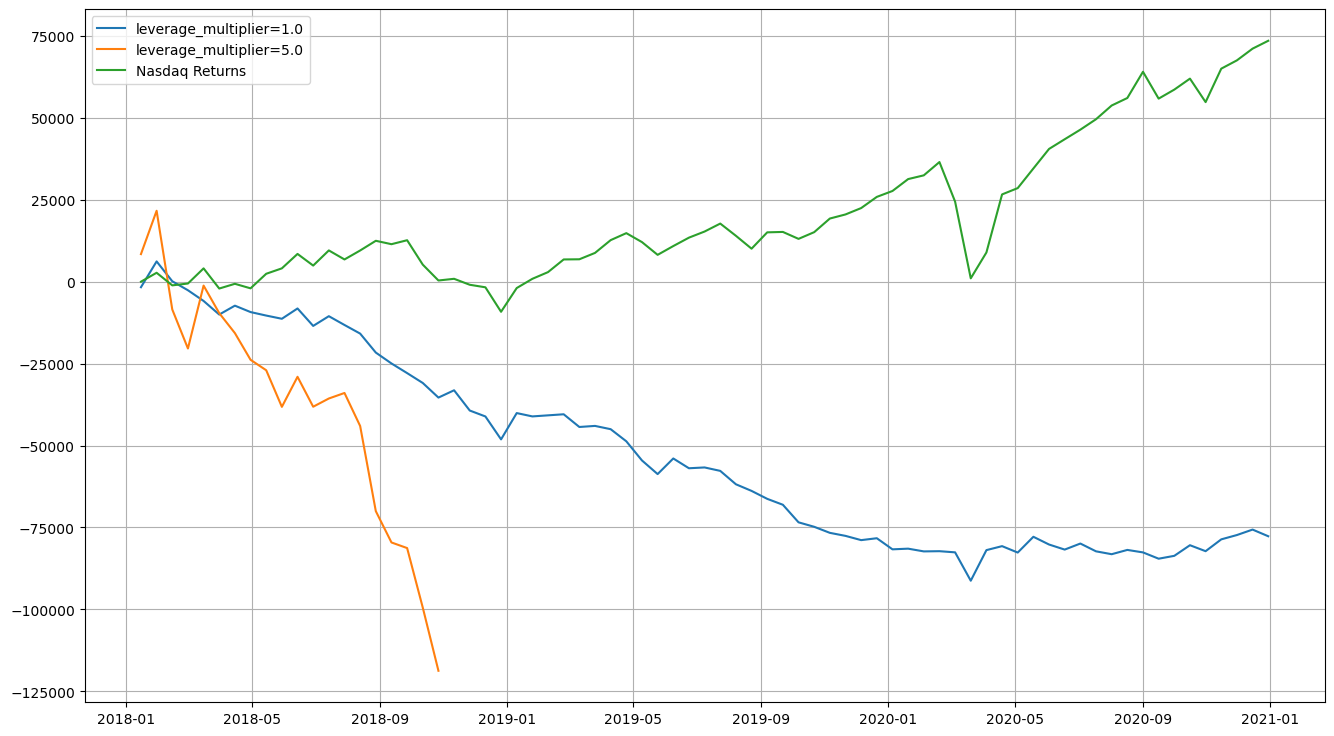

In [157]:
# Plot the backtest profits and the benchmark_data
plt.figure(figsize=(16, 9))
plt.plot(np.array(test_no_leverage['rebalance_periods'])[:, 1], np.cumsum(test_no_leverage['backtest_profits']), label=total_comparison.columns[0][1])
plt.plot(np.array(test_w_leverage['rebalance_periods'])[:, 1], np.cumsum(test_w_leverage['backtest_profits']), label=total_comparison.columns[1][1])
plt.plot(np.array(test_no_leverage['rebalance_periods'])[:, 1], np.cumsum(benchmark_returns), label='Nasdaq Returns')

plt.grid()
# Show labels
plt.legend()
# Show the plot
plt.show()